# Group 22 - Project - Weekly Sales Prediction Model

## Project Overview:


We would like to analyze how internal and external factors affect Walmart’s weekly sales. This model tries to achieve an approximate weekly sales prediction looking at previous years performance per store on a weekly basis. The data collected is from 2010-2012, including 45 Walmart stores across USA in the analysis. Apart from the usual sales prediction factors such as Holiday, Size of store etc, we also have the external data available about CPI, Temperature, Unemployment Rate and Fuel Prices in the region of each store and are interested in analysing whether these factors would impact Weekly Sales as much.

We have narrowed down the questions of interest to following:

1)How do different factors affect Weekly Sales? Which factors have a positive effect and which have a negative effect? Are there any factors that show no particular effect on weekly sales? Are there any interesting correlations amongst factors (eg: CPI & Unemployment should have a negative correlation.)

2)How does sales data vary with different types of stores?

3)Does the store size have a positive effect on the weekly sales?

4)How are different departments performing in terms of weekly sales? Is there a consistent winner?

5)Is there a positive correlation between holiday weeks and weekly sale numbers? (Explore the effect of sales/discounts during holidays).


Based on these above questions, we will select the most important factors that affect weekly sales and build different regression models. We will also check the accuracy of prediction of weekly sales on validation data set for each of these models to check for the model with maximum accuracy. Then, we will use this to predict weekly sales of a test dataset.

### Section 1: Data Acquisition and Cleaning Code:

We had 4 datasets to work off of -

Features - This contains information regarding the area a particular store is located in, such as "Temperature, Fuel_Price, CPI, Unemployment, IsHoliday".

Stores - This dataset contains details regarding a particular store - store number, type & size.

Train - This dataset contains weekly sales numbers for each department within every store.

Test - This is the dataset with just stores and departments, without sales data. We are going to test the model on this dataset.

We have combined Features, Stores and Train datasets to obtain a final dataset - "finaltrain". This is the dataset we are planning to use for building the model. Since there is no unique column that can be used as an index, we have used default indexing to identify unique rows.

We will further take a dataset from traintransform - "testtransform" - and run through the model to check for the accuracy of our model.

#### Step 1.1 - Creating training dataset by merging with features & stores

In [1]:
#Creating train dataset by merging various available datasets
#Merging features & stores stores
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
traintransform = pd.merge(features,stores, on ="Store",how="left")
traintransform.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [2]:
#Merging above dataset with train to create final dataset
finaltrain = pd.merge(traintransform,train, on =["Store","Date","IsHoliday"],how="inner")
finaltrain.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


#### "finaltrain" dataset has been created with all required columns, which will be cleaned further.

#### Step 1.2 - Cleaning Dataset

In [3]:
#.info() can be showed to check current datatype
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [4]:
#Converting Date to datetime format
finaltrain['Date'] =  pd.to_datetime(finaltrain['Date'])

In [5]:
#Checking final datatypes to confirm date has been changed to datetime
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null datetime64[ns]
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


Datatype of "Date" column has been changed to "datetime". All other columns have relevant datatypes.

Checking for duplicate & missing data

In [6]:
#Managing Duplicate Data:
#.duplicated() can be used to find out if there is any redundant row in the dataset. 

duplicateRowsDF = finaltrain.duplicated() 
duplicateRowsDF.unique()

array([False])

No duplicate entries were found in the dataset.

In [7]:
#Managing Missing Data
#inaltrain.isnull().sum() can be used to find out which columns have null value, so we can replace those values or drop it.
finaltrain.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [8]:
#This shows we only have null data in "Markdown". We are filling it with "0" values for further analysis.
X_train=finaltrain.fillna(0)

In [9]:
X_train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Weekly_Sales    0
dtype: int64

This shows that there are no more null values in the final dataframe, "df", which will be used for further analysis.

In [10]:
X_train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


### Section 2 - Analysis of data

#### Step 2.0 - Creating dummy values for categorical variables

In [11]:
#Importing all required libraries
from scipy import sparse
import scipy.stats as ss
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

In [12]:
X_trainwd = X_train
X_train = pd.get_dummies(X_train, columns=['IsHoliday'], drop_first = False)
X_train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday_False,IsHoliday_True
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,1,24924.50,1,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,50605.27,1,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,3,13740.12,1,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,4,39954.04,1,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,32229.38,1,0


In [13]:
X_train = pd.get_dummies(X_train, columns=['Type'], drop_first = False)

### Analysis 1 - Correlation matrix to get overall correlations between all parameters

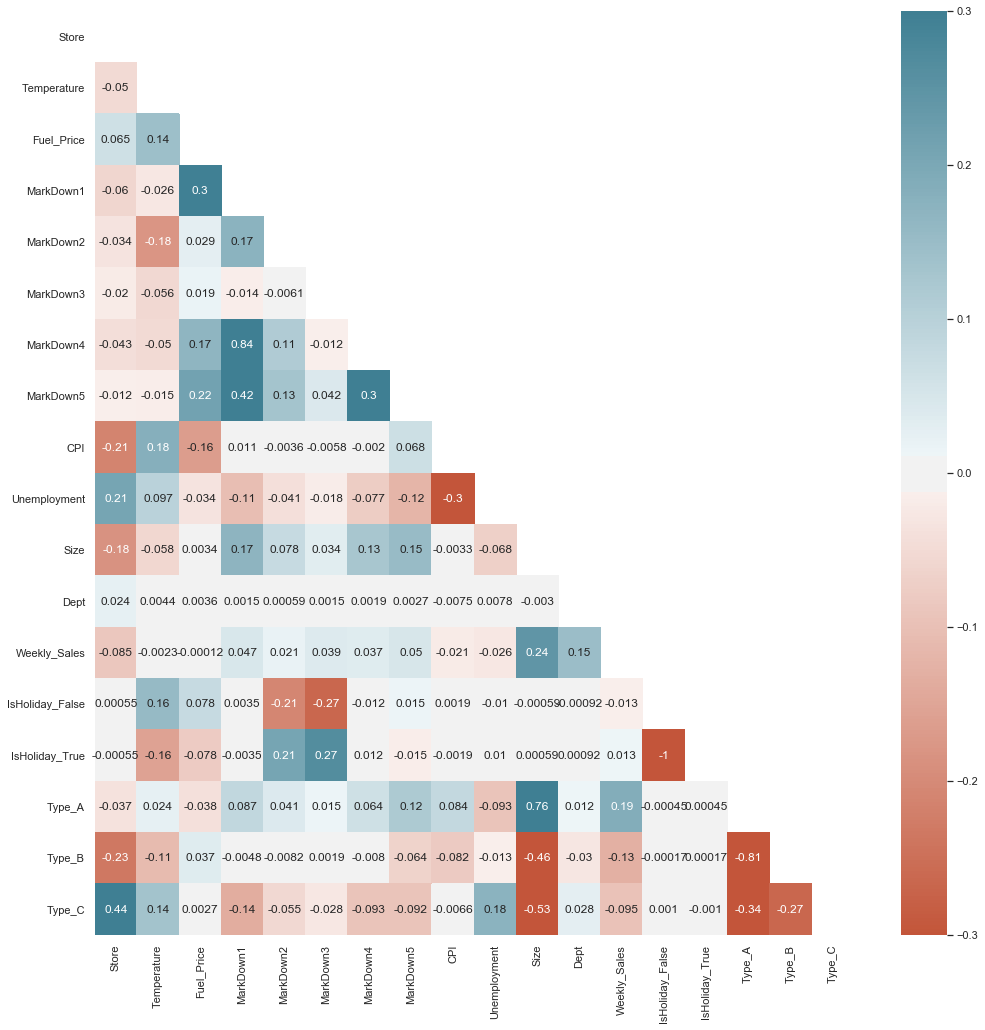

In [14]:
#Creating heatmap
sns.set(style="white")
matrix = X_train.corr()
f, ax = plt.subplots(figsize=(17, 17))
mask = np.zeros_like(matrix, dtype=np.bool)
cmap = sns.diverging_palette(20,220,n=200, as_cmap=True)
mask[np.triu_indices_from(mask)] = True    
sns.heatmap(matrix, mask=mask, cmap=cmap, vmax=.3,vmin=-.3,annot=True, square=False);

### Observations & Conclusions from Analysis 1

#### Part A - With respect to Weekly Sales:

1)External variables such as Temperature, Fuel_Price have very little effect on sales.

2)Size of store, type of store (specifically Type A), Department, Markdowns, Holiday have an effect on weekly sales. These will be explored further.

#### Part B - Relationship between parameters:

#### Observation1:

1)Type A stores have a strong correlation with Size, this indicates Type A stores are larger than others. Type C has strong negative correlation with Size. This means Type C stores are smaller.

2)Unemployment and CPI has negative correaltion. This is natural as areas with high unemployment have less spending power.

3)Unemployment and Type C stores show positive correlation. This indicates areas with high unemployment have more Type C stores. Since unemployment and CPI (which indicates spending power of a region) have strong negative correlation, this means areas that have high unemployment and thus, low spending power have more type C stores (which are also smaller).

In keeping with the above analysis, Type A and unemployment has negative correlation. This indicates areas with low unemployment (and thus high CPI --> Spending power) have more number of Type A stores.

#### Insight - The above observations suggest that Type A stores might be the flagship stores which are located in their focal areas with higher spending power (and low unemployment). Similarly, Type C stores might be the less important stores and thus present in non-focal areas and have smaller sizes.¶


#### Observation2:

Markdown shows a strong positive correlation with IsHoliday.

#### Insight - Combining this observation with the fact that Markdown values are only present for few dates (and most rows have null values), we could conclude that markdown is related to discounts/sales period.

#### Conclusion - Since external factors like temperature and fuel price don't show a correlation, we won't be considering these factors for building regression model.


### Analysis 2 - Type of Stores Vs Size

#### Analysing the observations about size of different types of stores from analysis 1 in more detail:

In [15]:
typeAvssales=X_train.groupby(X_train["Type_A"])["Weekly_Sales"].mean()
typeBvssales=X_train.groupby(X_train["Type_B"])["Weekly_Sales"].mean()
typeCvssales=X_train.groupby(X_train["Type_C"])["Weekly_Sales"].mean()

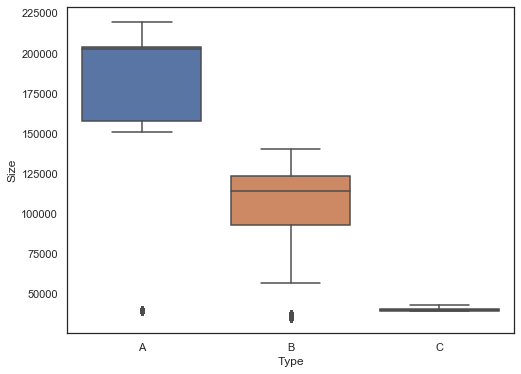

In [16]:
store_type = pd.concat([X_trainwd.Type,X_trainwd.Size], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type',y='Size', data=store_type)

### Observations & Conclusions from Analysis 2:

This graph shows the range of sizes of different types of stores.

1)Smallest Type A store is still bigger than largest Type B store. Type C stores are very small as compared to both A & B.

2)There is more variation in sizes of Type A & B stores, whereas the range seems to be very narrow for Type C stores.

### Analysis 3 - Type of Store vs Sales

Building off the above analysis, we'll now see if there is a relation between type of store and weekly sales.

Text(0, 0.5, 'Mean Weekly Sales')

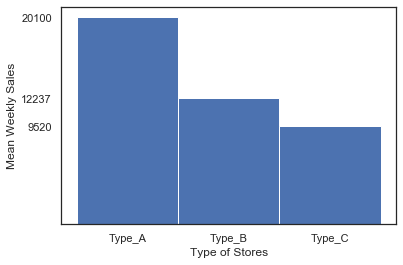

In [17]:
x=[('Type_A',typeAvssales[1]),('Type_B',typeBvssales[1]),('Type_C',typeCvssales[1])]
labels, ys = zip(*x)
xs = np.arange(len(labels))
width = 1
plt.bar(xs,ys,width,align='center')
plt.xticks(xs,labels)
plt.yticks(ys)
plt.xlabel("Type of Stores")
plt.ylabel("Mean Weekly Sales")

### Observations & Conclusions from Analysis 3:

#### Observation -

Type A stores clearly show a very high value of mean weekly sales, followed by Type B and then Type C.

#### Conclusion -

This is in keeping with the above analyses. Since Type A stores are larger, they are present in areas where population has more spending power, they also show a high mean weekly sales value.

### Analysis 4 - Department vs Weekly Sales

We saw a correlation between weekly sales and department. Since department essentially means department number, this means higher department numbers are producing more sales. Exploring this further to see if the top sales generating departments have higher department numbers.

In [18]:
X_dept = X_train.groupby(by="Dept").agg({"Weekly_Sales":["mean"]})
X_dept = X_dept.sort_values(("Weekly_Sales","mean"), ascending = False)
X_dept.head(5)

,Weekly_Sales
,mean
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224


Text(0, 0.5, 'Mean Weekly Sales')

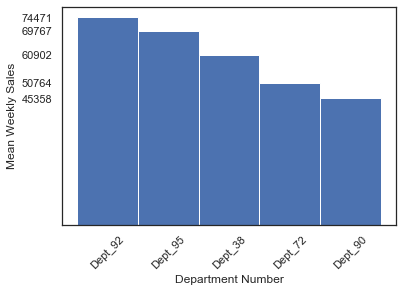

In [19]:
x123=[('Dept_92',74470.587327),('Dept_95',69766.779910),('Dept_38',60902.068848),('Dept_72',50763.872744),('Dept_90',45358.143613)]
labels, ys = zip(*x123)
xs = np.arange(len(labels))
width = 1
plt.bar(xs,ys,width,align='center')
plt.xticks(xs, labels,rotation = 45)
plt.yticks(ys)
plt.xlabel("Department Number")
plt.ylabel("Mean Weekly Sales")

### Observations & Conclusions from Analysis 4:

#### Observation:

As we can see, out of top 5 departments, top 3 have department number >= 90.

#### Conclusion:

This could mean departments are ordered in a descending order of popularity. This could also have an effect on how departments are located within stores.

We have also identified the top selling departments:

Dept 92 : Dry-Grocery

Dept 95 : DSD-Grocery,Snacks and Beverages

Dept 38 : Prescription Phatramcy

Dept 72 : Electronics

Dept 90 : Dairy

This is using external referencd source - https://www.reddit.com/r/walmart/comments/6x43dj/department_numbers_updated/

### Analysis 5 - Holiday vs Weekly Sales

Text(0.5, 1.0, 'Sales vs IsHoliday')

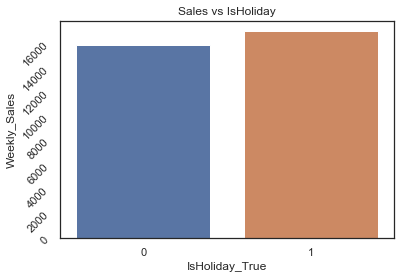

In [20]:
salesvsholidays = X_train.groupby(X_train["IsHoliday_True"])["Weekly_Sales"].mean()
sns.barplot(x=salesvsholidays.index,y=salesvsholidays);
plt.yticks(rotation=45);
plt.title("Sales vs IsHoliday")

Above plot clearly shows a correlation between sales and holidays. Holidays have a higher mean weekly sales as compared to non-holidays.But this is not as high as we would expect it to be.

Analysing this further to see the effect of holidays on sales. Since we know the holiday period is towards end of year, we have created a timeseries graph with month-year on X-axis and weekly sales on Y-axis

In [21]:
X_train["Year"] = pd.DatetimeIndex(X_train["Date"]).year
X_train["Month"] = pd.DatetimeIndex(X_train["Date"]).month
X_train["Month Year"] = pd.to_datetime(X_train["Date"]).dt.to_period("M")
X_train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Year,Month,Month Year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,1,24924.50,1,0,1,0,0,2010,2,2010-02
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,2,50605.27,1,0,1,0,0,2010,2,2010-02
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,3,13740.12,1,0,1,0,0,2010,2,2010-02
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,4,39954.04,1,0,1,0,0,2010,2,2010-02
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,5,32229.38,1,0,1,0,0,2010,2,2010-02


In [22]:
X_month_year = X_train.groupby("Month Year").agg({"Weekly_Sales":['mean']})
X_month_year.head()

,Weekly_Sales
,mean
Month Year,
2010-02,16076.778701
2010-03,15432.626612
2010-04,15745.551340
2010-05,15996.481695
2010-06,16486.250953


C:\Users\sushi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



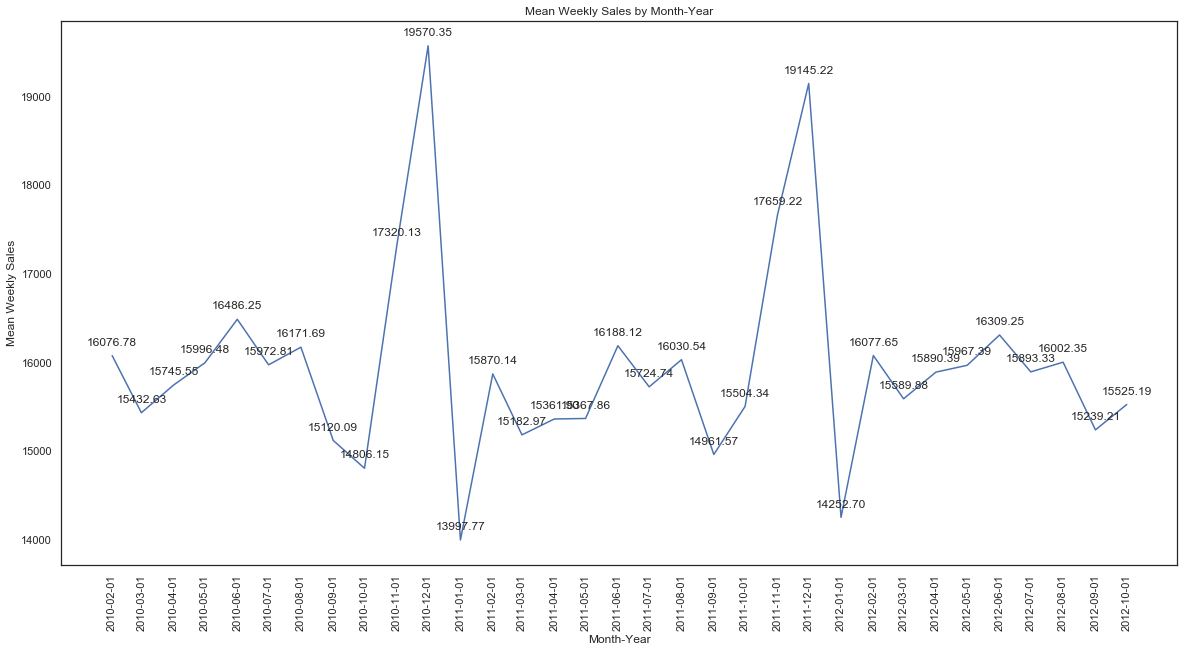

In [23]:
X_month_year.index = X_month_year.index.to_timestamp()
plt.figure(figsize = (20,10))
x=X_month_year.index
y=X_month_year[("Weekly_Sales","mean")]
plt.plot(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Month-Year')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by Month-Year')
plt.xticks(x)
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.show()

As we can see, there are very high spikes in the month of November and December(corresponding to holidays). There is dip in sales in the month of Janauary.

In order to analyse this further, looking at some of the highest sales numbers.

In [24]:
X_train.loc[X_train["Weekly_Sales"]>300000]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Year,Month,Month Year
32594,4,2010-11-26,48.08,2.752,0.00,0.00,0.00,0.00,0.00,126.669267,...,72,381072.11,0,1,1,0,0,2010,11,2010-11
36312,4,2011-11-25,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,...,72,385051.04,0,1,1,0,0,2011,11,2011-11
36557,4,2011-12-23,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,...,7,318422.01,1,0,1,0,0,2011,12,2011-12
51826,6,2010-11-26,65.79,2.735,0.00,0.00,0.00,0.00,0.00,213.267296,...,72,342578.65,0,1,1,0,0,2010,11,2010-11
55545,6,2011-11-25,62.78,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,...,72,326866.60,0,1,1,0,0,2011,11,2011-11
90645,10,2010-11-26,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,...,72,693099.36,0,1,0,1,0,2010,11,2010-11
90886,10,2010-12-24,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,...,7,406988.63,1,0,0,1,0,2010,12,2010-12
90936,10,2010-12-24,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,...,72,404245.03,1,0,0,1,0,2010,12,2010-12
94393,10,2011-11-25,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,...,72,630999.19,0,1,0,1,0,2011,11,2011-11
94634,10,2011-12-23,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,...,7,341308.00,1,0,0,1,0,2011,12,2011-12


### Observations & Conclusions from Analysis 5:

Looking at the date column, it shows some clear trends. Most of these are in the Thanksgiving - Christmas period. However, an interesting observation is that pre-Christmas dates (23-24-Dec) have not been considered as holidays. Since these are actually in the holiday period and also account for some of the highest selling days (more than 300000), we can say that the actual difference between mean holiday sales and non-holiday sales is higher than that shown in the first graph.

Based on this analysis, we can also conclude that we need to incorporate this additional information (how pre-christams dates are affecting weekly sales) in the regression model. For this, we will be crreating a new column - "Days to Next Christmas".

#### Based on the above analysis, we have built regression models. This has been explained in the next document - "Regression & Prediction".